In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv('yds_train2018.csv')
test_data=pd.read_csv('yds_test2018.csv')
submission_format=pd.read_csv('sample_submission.csv')
expances=pd.read_csv('promotional_expense.csv')
holiday=pd.read_excel('holidays.xlsx')

In [3]:
import datetime
def convert_to_date(d):
    r = datetime.datetime.strptime(d + '-0', "%Y%W-%w")
    return r

In [4]:
train_data=train_data.groupby(['Year','Country','Product_ID','Month','Week']).sum().reset_index()

In [5]:
train_data.drop('S_No',axis=1,inplace=True)

In [6]:
train_data['Year']=train_data['Year'].apply(lambda x:str(x))
train_data['Month']=train_data['Month'].apply(lambda x:str(x))
train_data['Week']=train_data['Week'].apply(lambda x:str(x))

In [7]:
train_data['Date']=train_data['Year']+train_data['Week']

In [8]:
#dateparse = lambda x: pd.to_datetime(x, format='%Y%m%d', errors = 'coerce')

In [9]:
train_data['Date']=train_data['Date'].apply(convert_to_date)

In [10]:
train_data.head()

,Year,Country,Product_ID,Month,Week,Sales,Date
0,2013,Argentina,1,1,1,4335975.0,2013-01-13
1,2013,Argentina,1,1,2,9753975.0,2013-01-20
2,2013,Argentina,1,1,3,10309950.0,2013-01-27
3,2013,Argentina,1,1,4,7484400.0,2013-02-03
4,2013,Argentina,1,1,5,2461725.0,2013-02-10


In [11]:
train_data=train_data.set_index('Date')

In [12]:
train_data_req=train_data['Sales']

In [13]:
import matplotlib.pyplot as plt

In [14]:
fig, ax = plt.subplots()
for desc, group in train_data.groupby(['Country','Product_ID']):
    group.plot(x = group.index, y='Sales', label=desc,ax = ax, title='sells of the product', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('sales in local currency')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

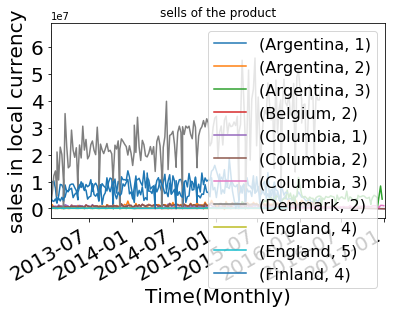

In [15]:
plt.show()

In [16]:
train_data['Product_ID']=train_data['Product_ID'].apply(lambda x:str(x))

In [17]:
arima_data={}
count=0
for i,grp in train_data.groupby(['Country','Product_ID']):
    i=''.join(i)
    arima_data[i]=grp.Sales.index
     
#     train_data[g]
#     grp.append(g)

In [19]:
from pandas import read_csv
import warnings
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):

    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return best_cfg

# load dataset
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
# evaluate_models(arg1_data.values, p_values, d_values, q_values)

In [20]:
def evaluate_arima_model2(X, arima_order):

    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return model,predictions

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [21]:
arima_params=[]

In [ ]:
for value in arima_data.itervalues():
    best_params=evaluate_models(train_data_req[train_data_req.index.isin(value)].values, p_values, d_values, q_values)
    arima_params.append(best_params)

ARIMA(0, 0, 0) MSE=108331001295730.406
ARIMA(0, 0, 1) MSE=48225946848871.523
ARIMA(0, 0, 2) MSE=36701031609807.375
ARIMA(0, 1, 0) MSE=20827949815844.848
ARIMA(0, 1, 1) MSE=22943657469063.559
ARIMA(0, 1, 2) MSE=21175035611711.180
ARIMA(0, 2, 0) MSE=44980329772022.055
ARIMA(0, 2, 1) MSE=20720195205639.598
ARIMA(1, 0, 0) MSE=22069618571119.238
ARIMA(1, 0, 1) MSE=23645114974310.797
ARIMA(1, 0, 2) MSE=21930412142753.348
ARIMA(1, 1, 0) MSE=21242777740460.082
ARIMA(1, 1, 1) MSE=21802877556393.965
ARIMA(1, 1, 2) MSE=21532869203941.871
ARIMA(1, 2, 0) MSE=37260580866323.148
ARIMA(2, 0, 0) MSE=22300132415646.094
ARIMA(2, 0, 1) MSE=22540028668386.441
ARIMA(2, 0, 2) MSE=22300045791621.453
ARIMA(2, 1, 0) MSE=20587233986558.859
ARIMA(2, 1, 1) MSE=21012582195363.547
ARIMA(2, 1, 2) MSE=21720460031306.648
ARIMA(2, 2, 0) MSE=34800669151764.715
ARIMA(4, 0, 0) MSE=21078071525656.109
ARIMA(4, 0, 1) MSE=21983723579600.371
ARIMA(4, 0, 2) MSE=21956121762390.238
ARIMA(4, 1, 0) MSE=19810982267458.473
ARIMA(4, 1,

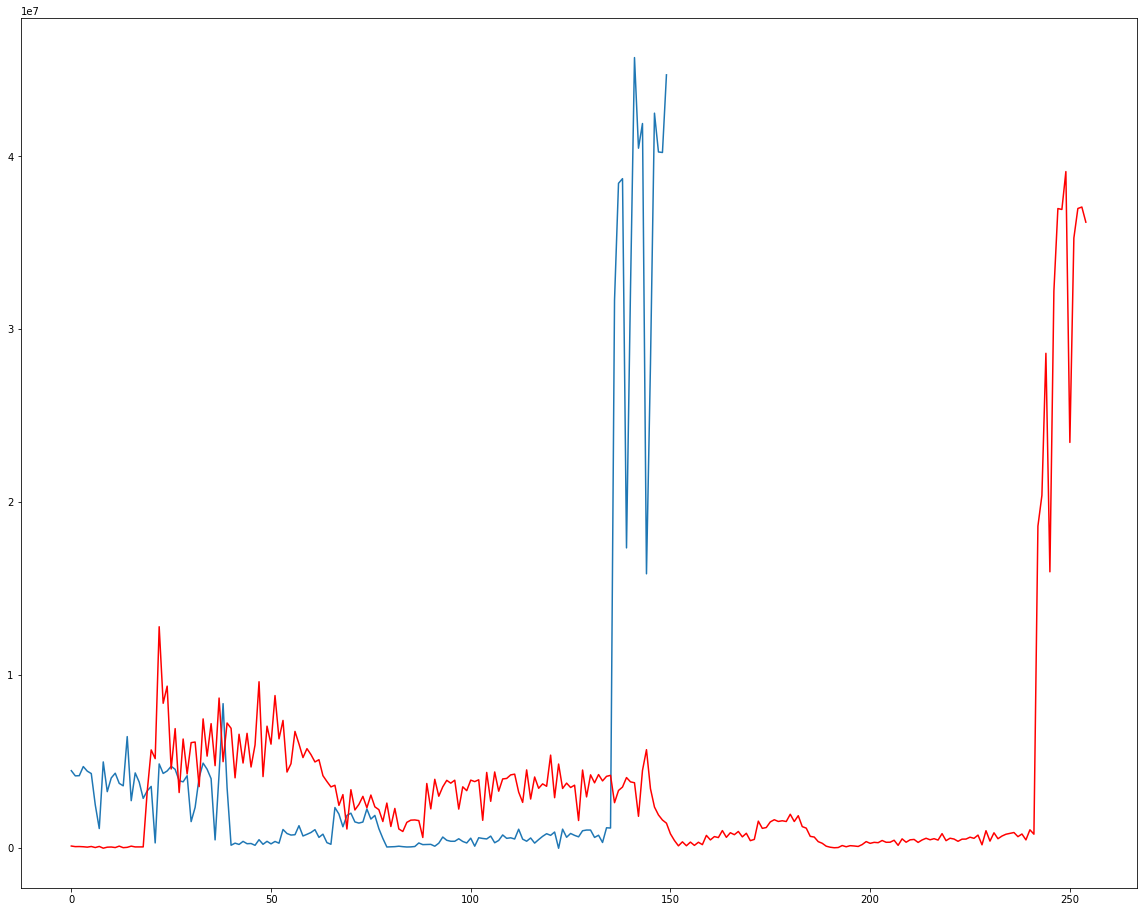

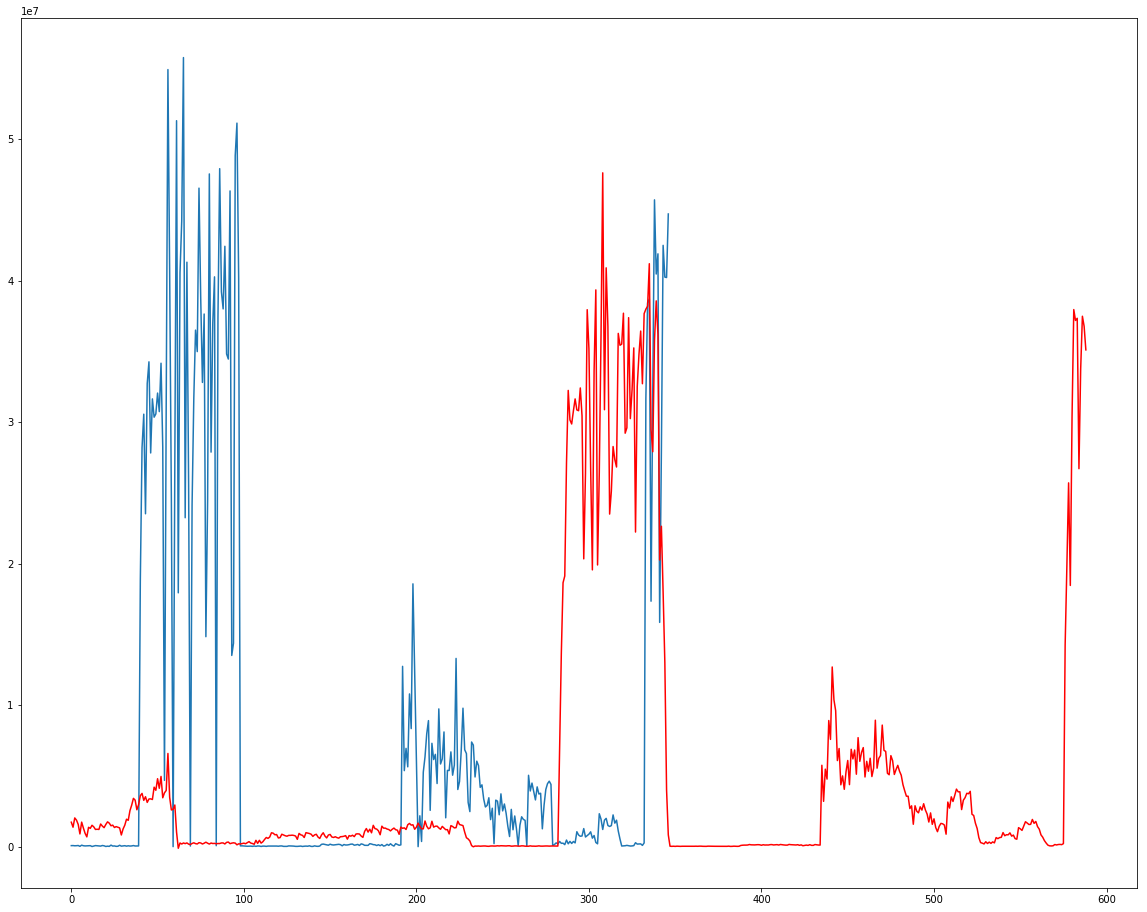

KeyboardInterrupt: 

In [25]:
i=0
for value in arima_data.itervalues():
    model,predictions=evaluate_arima_model2(train_data_req[train_data_req.index.isin(value)].values,(6,1,0))
    i=i+1
    test=train_data_req[train_data_req.index.isin(value)][int(len(train_data_req[train_data_req.index.isin(value)]) * 0.80):].values
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()